<a href="https://colab.research.google.com/github/faridelya/Pandas-Seaborn-Numpy/blob/main/A_21_Comparison_of_Feature_Space_for_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/content/drive/MyDrive/mos_data/heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **Helping Function for Confusion Matric**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## **Task 1. The “HeartDisease” column is the dependent variable. It is currently coded such that 0 = No Heart Disease and 1 = Heart Disease. Make sure this variable is treated as a nominal variable in the model. The following predictor variables should be treated as continuous: “Age”, “RestingBP”, “Cholesterol”, “MaxHR”, and “Oldpeak”. The following predictor variable should be treated as nominal data: “Sex”,“ChestPainType”, “RestingECG”, “FastingBS”, “ExerciseAngina”, and “ST_Slope”.Make sure all variables are treated appropriately in the model. You do not need to convert the nominal predictor variables to dummy variable since this is not required to 'use Random Forest.**

In [ ]:
X = df[['Age', 'MaxHR',  'Oldpeak', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG','Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope',]] # independent variable 
y =df['HeartDisease'] # dependent variable

In [ ]:
X.head(4)

,Age,MaxHR,Oldpeak,RestingBP,Cholesterol,FastingBS,RestingECG,Sex,ChestPainType,ExerciseAngina,ST_Slope
0,40,172,0.0,140,289,0,Normal,M,ATA,N,Up
1,49,156,1.0,160,180,0,Normal,F,NAP,N,Flat
2,37,98,0.0,130,283,0,ST,M,ATA,N,Up
3,48,108,1.5,138,214,0,Normal,F,ASY,Y,Flat


## **Task 2. Subset the variables to create models using**
- **(1) all the available predictor variables,**
- **(2) just “Cholesterol” and “MaxHR”, and** 
- **(3) “Age”, “RestingBP”, and “MaxHR”.**


### **Answer**
**Sklearn can not support categorical handling during training, i got error**
- ValueError: could not convert string to float: 'Normal'
- so i just convert to encoded form 

In [ ]:
# convert to encoded form 
from sklearn.preprocessing import LabelEncoder

X[['RestingECG_enc', 'Sex_enc', 'ChestPainType_enc', 'ExerciseAngina_enc', 'ST_Slope_enc']] =  X[X.columns[6:]].apply(LabelEncoder().fit_transform)
X.drop(X.columns[6:11], inplace=True, axis=1)
X.head(4)

,Age,MaxHR,Oldpeak,RestingBP,Cholesterol,FastingBS,RestingECG_enc,Sex_enc,ChestPainType_enc,ExerciseAngina_enc,ST_Slope_enc
0,40,172,0.0,140,289,0,1,1,1,0,2
1,49,156,1.0,160,180,0,1,0,2,0,1
2,37,98,0.0,130,283,0,2,1,1,0,2
3,48,108,1.5,138,214,0,1,0,0,1,1


In [ ]:
#subset
all_variables = X
two_variables = X[['Cholesterol','MaxHR']]
three_variables = X[['Age','RestingBP','MaxHR']]

## **Task 3. Split the data into separate and non-overlapping training and testing sets using the “HeartDisease” variable for stratification.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split( all_variables, y, test_size=0.25, random_state=42 ,stratify=y)  # all varaiables feature space


X_train2, X_test2, y_train2, y_test2 = train_test_split( two_variables, y, test_size=0.25, random_state=42 ,stratify=y)  # two variables feature space


X_train3, X_test3, y_train3, y_test3 = train_test_split( three_variables, y, test_size=0.25, random_state=42 ,stratify=y) # three variables featurespace

## **Task 4. Train three Random Forest models using the three different feature spaces. You can use the default hyperparameter settings.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()
clf2 = RandomForestClassifier()
clf3 = RandomForestClassifier()

model1 = clf1.fit(X_train1, y_train1)
model2 = clf2.fit(X_train2, y_train2)
model3 = clf3.fit(X_train3, y_train3)

## **Task 5. Assess the models using the withheld testing data. Calculate Confusion Matrices and Overall Accuracy metrics. Using the precited probabilities, calculate the Area Under the Receiver Operating Characteristic (ROC) Curve (AUC ROC). Use the results to discuss and compare the different feature spaces**

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

rnd1_pred = model1.predict(X_test1)
pred_prob1 = model1.predict_proba(X_test1)

rnd2_pred = model2.predict(X_test2)
pred_prob2 = model2.predict_proba(X_test2)

rnd3_pred = model3.predict(X_test3)
pred_prob3 = model3.predict_proba(X_test3)

a = accuracy_score(y_test1,rnd1_pred )
b = accuracy_score(y_test2,rnd2_pred )
c = accuracy_score(y_test3,rnd3_pred )
a = pd.DataFrame({"Overall Accuracy for Three models":{"Model1 trained on all variables":a,"Model2 trained on two variables":b,"Model3 trained on three variables":c}})
a

,Overall Accuracy for Three models
Model1 trained on all variables,0.904348
Model2 trained on two variables,0.691304
Model3 trained on three variables,0.682609


In [ ]:
a = auc_roc1 = roc_auc_score(y_test1, pred_prob1[:,1])
b = auc_roc1 = roc_auc_score(y_test2, pred_prob2[:,1])
c = auc_roc1 = roc_auc_score(y_test3, pred_prob3[:,1])
a = pd.DataFrame({"AUC ROC for Three models":{"Model1 trained on all variables":a,"Model2 trained on two variables":b,"Model3 trained on three variables":c}})
a

,AUC ROC for Three models
Model1 trained on all variables,0.940486
Model2 trained on two variables,0.734156
Model3 trained on three variables,0.724333


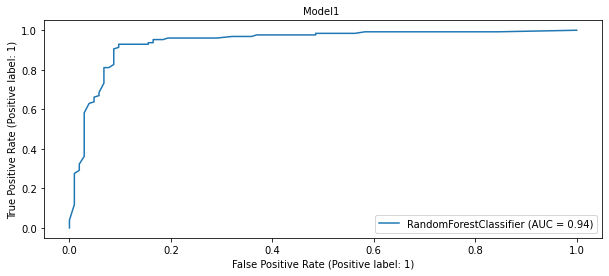

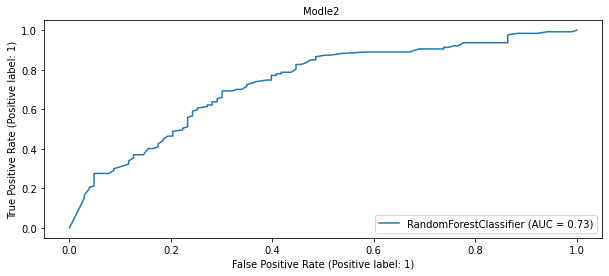

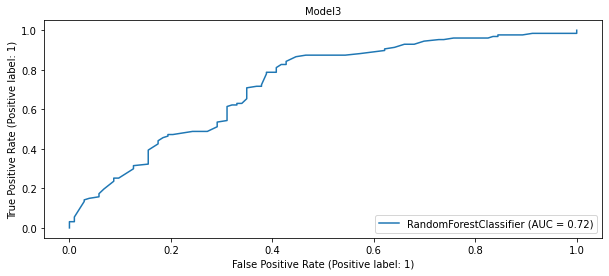

In [ ]:
i= [clf1,clf2,clf3]
s = ["Model1 ", "Modle2 ", "Model3"]
x=0
a=0
for t in [[X_test1, y_test1],[X_test2, y_test2],[X_test3, y_test3]]:
  fig,ax = plt.subplots(figsize=(10,4))
  RocCurveDisplay.from_estimator(i[a] , t[0], t[1], ax=ax, )
  a+=1
  plt.title(s[x], size=10)
  x+=1
  plt.show( )

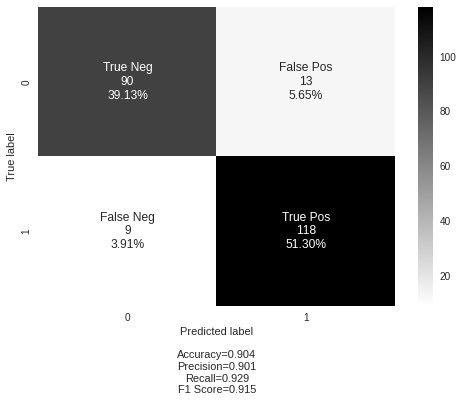

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
cf_matrix = confusion_matrix( y_test1,rnd1_pred )
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')


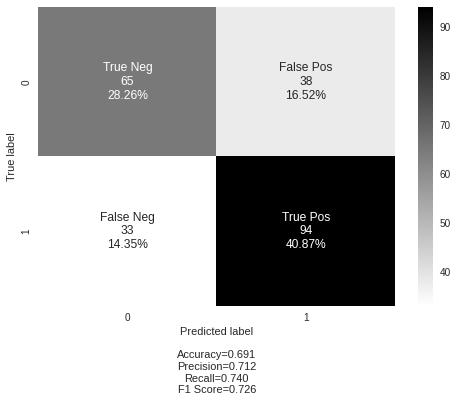

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
cf_matrix = confusion_matrix( y_test2,rnd2_pred )
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')


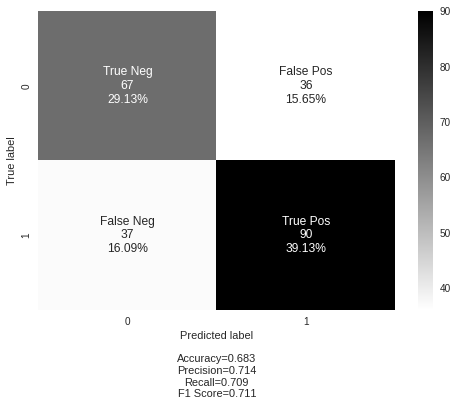

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
cf_matrix = confusion_matrix( y_test3,rnd3_pred )
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

##  **Feature Importancet**
- as we can see that some features has high predictor power so when we use that feature in training that model will give high accurate prediction 

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model1, X_test1, y_test1, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances2 = pd.Series(result.importances_mean, index=X.columns)

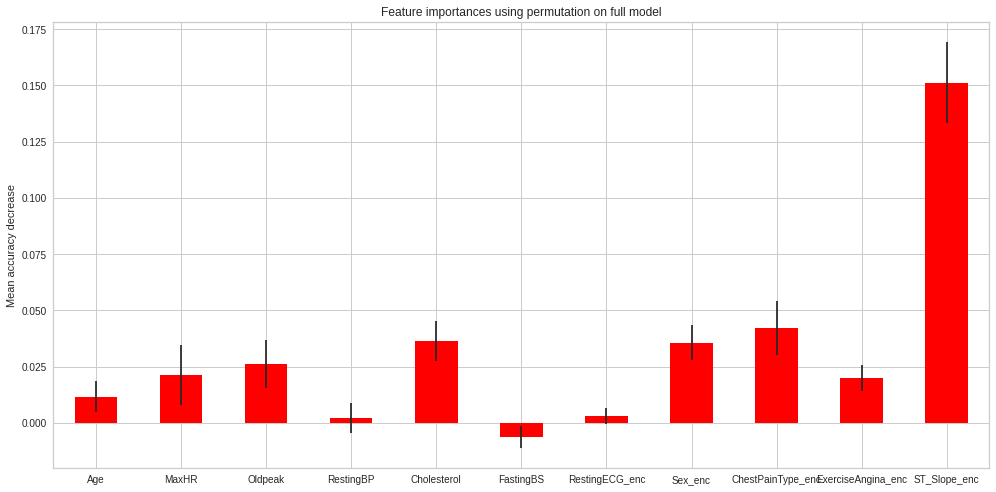

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax, rot=0,color='red')
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

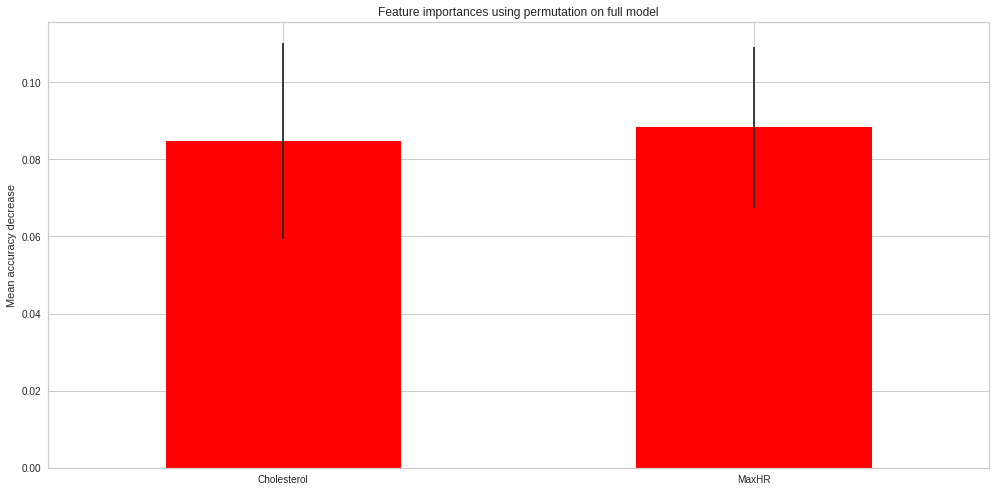

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model2, X_test2, y_test2, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances2 = pd.Series(result.importances_mean, index=X_test2.columns)

fig, ax = plt.subplots(figsize=(14,7))
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax, rot=0,color='red')
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

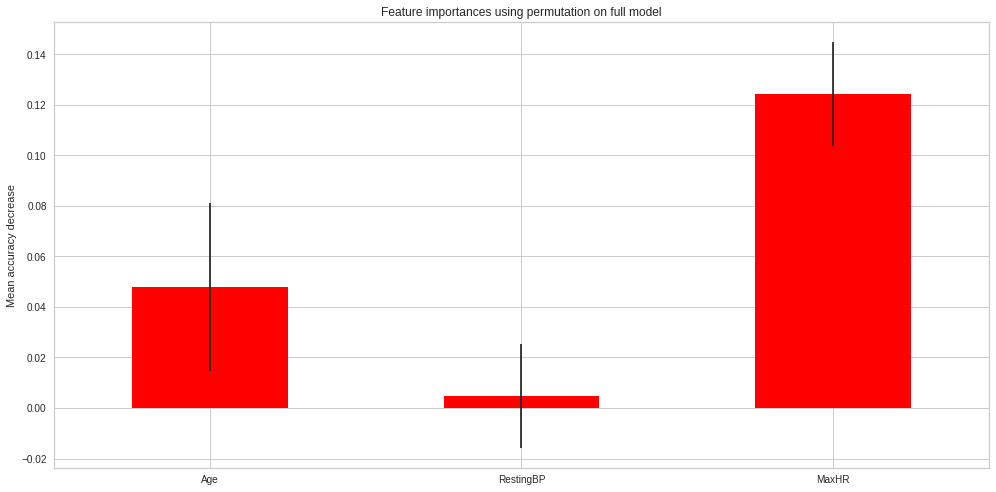

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model3, X_test3, y_test3, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances2 = pd.Series(result.importances_mean, index=X_test3.columns)

fig, ax = plt.subplots(figsize=(14,7))
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax, rot=0,color='red')
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



- The 1st model has high accuracy and high auc roc so that has good feature space that can give good predictive power to model.
- The second model also has some import feature variable in feature sapce that also contain good predictive power so the 2nd model2 has best from 3rd modle and has high acuracy and auc roc from 3rd model.
-the 3rd model has bad feature space as number of feature is greater than model2  but these feature space has not engouh predictive power that can give to model durng training so its accuracy and auc roc is lower than previous two models.

we have shown that which feature is important and has good predictive power in above plots.
